In [1]:
# Import the pandas library for data manipulation and analysis.
import pandas as pd
# Import train_test_split from sklearn.model_selection for splitting data into training and testing sets.
from sklearn.model_selection import train_test_split
# Import torch, the main library for PyTorch.
import torch
# Import Dataset and DataLoader from torch.utils.data for creating custom datasets and managing data loading in batches.
from torch.utils.data import Dataset, DataLoader
# Import nn (neural networks) from torch for defining neural network architectures.
import torch.nn as nn
# Import optim (optimizers) from torch for implementing optimization algorithms.
import torch.optim as optim
# Import matplotlib.pyplot for plotting and visualization.
import matplotlib.pyplot as plt

In [ ]:
# Set random seeds for reproducibility across different runs.
# torch.manual_seed(42) sets the seed for CPU operations.
torch.manual_seed(42)

In [3]:
# Check if a CUDA-enabled GPU is available and assign it to the 'device' variable; otherwise, use the CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Print the device being used for training/inference.
print(f"Using device: {device}")

Using device: cpu


In [ ]:
# Load the Fashion-MNIST training dataset from a CSV file into a pandas DataFrame.
df = pd.read_csv('fashion-mnist_train.csv') # Reads the data from the specified CSV path.
df.head() # Displays the first 5 rows of the DataFrame, providing a quick overview of the data structure, including labels and pixel values.

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


                                               image  label
0  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      9
1  {'bytes': b"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      0
2  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      0
3  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      3
4  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      0


In [5]:
# Print the shape of the DataFrame (number of rows, number of columns).
df.shape

(60000, 2)

ValueError: cannot reshape array of size 1 into shape (28,28)

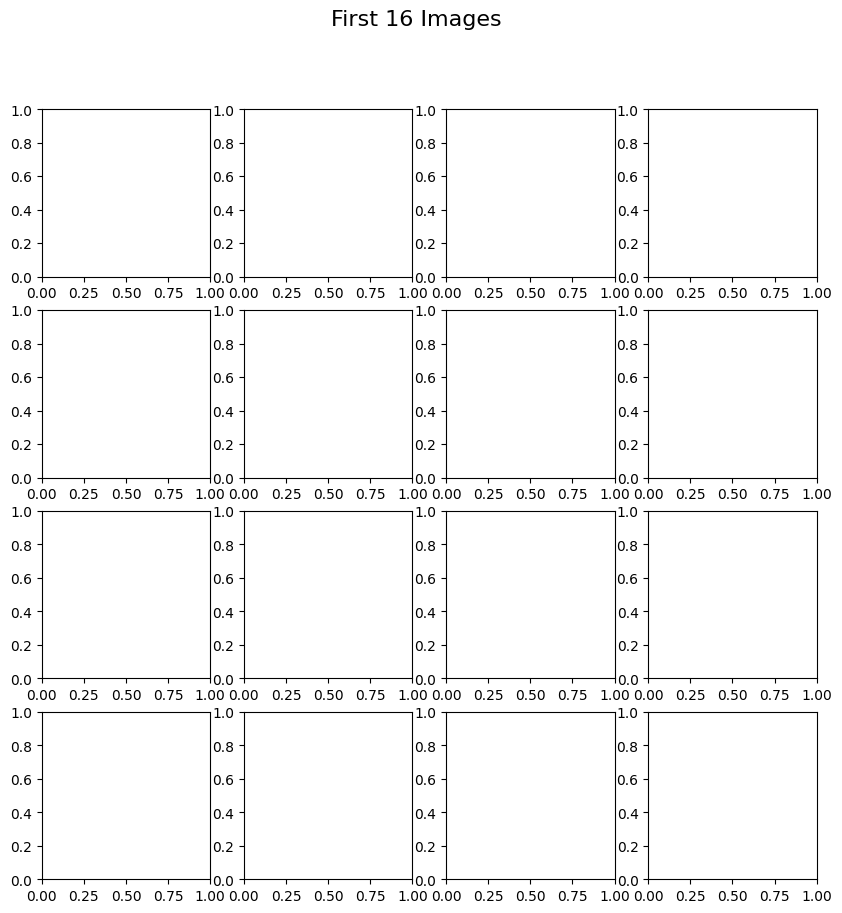

In [6]:
# Create a figure and a 4x4 grid of subplots for displaying images.
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
# Set the main title for the figure.
fig.suptitle("First 16 Images", fontsize=16)

# Iterate through the first 16 images in the DataFrame and plot them.
for i, ax in enumerate(axes.flat):
    # Extract pixel values for the current image (skipping the label column) and reshape to a 28x28 array.
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28 for image display
    # Display the image in grayscale.
    ax.imshow(img)  # Display in grayscale
    # Turn off the axis for a cleaner look.
    ax.axis('off')  # Remove axis for a cleaner look
    # Set the title of each subplot to display the image's label.
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

# Adjust the layout to prevent titles and labels from overlapping.
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
# Display the plot.
plt.show()

In [ ]:
# train test split

# Extract features (pixel data) by selecting all columns from the second column onwards.
X = df.iloc[:, 1:].values
# Extract labels (clothing categories) by selecting the first column.
y = df.iloc[:, 0].values

In [ ]:
# Split the dataset into training and testing sets.
# X: features, y: labels
# test_size=0.2 means 20% of the data will be used for testing.
# random_state=42 ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize the pixel values of the training features by dividing by 255.0 (max pixel value).
X_train = X_train/255.0
# Normalize the pixel values of the testing features by dividing by 255.0.
X_test = X_test/255.0

In [ ]:
# Define a custom PyTorch Dataset class for handling the Fashion MNIST data.
class CustomDataset(Dataset):

  # Constructor for the CustomDataset.
  def __init__(self, features, labels):

    # Convert features (pixel data) to PyTorch tensors with float32 type and reshape them to (batch_size, 1, 28, 28).
    self.features = torch.tensor(features, dtype=torch.float32).reshape(-1,1,28,28)
    # Convert labels to PyTorch tensors with long type.
    self.labels = torch.tensor(labels, dtype=torch.long)

  # Returns the total number of samples in the dataset.
  def __len__(self):
    return len(self.features)

  # Returns the feature and label for a given index.
  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [ ]:
# Create an instance of CustomDataset for the training data.
train_dataset = CustomDataset(X_train, y_train)

In [ ]:
# Create an instance of CustomDataset for the test data.
test_dataset = CustomDataset(X_test, y_test)

In [ ]:
# Create a DataLoader for the training dataset.
# batch_size=32 specifies the number of samples per batch.
# shuffle=True shuffles the data at each epoch.
# pin_memory=True speeds up data transfer to GPU.
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
# Create a DataLoader for the test dataset.
# shuffle=False because shuffling is not needed for evaluation.
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)

In [ ]:
# Define a custom Convolutional Neural Network (CNN) class inheriting from nn.Module.
class MyNN(nn.Module):
    # Constructor for the neural network.
    def __init__(self, input_features):
        # Call the constructor of the parent class (nn.Module).
        super().__init__()

        # Define the feature extraction part of the network using a Sequential container.
        self.features = nn.Sequential(
            # First Convolutional Layer: 1 input channel, 32 output channels, 3x3 kernel, 'same' padding.
            nn.Conv2d(input_features, 32, kernel_size=3, padding='same'),
            # ReLU activation function.
            nn.ReLU(),
            # Batch Normalization layer for 32 features.
            nn.BatchNorm2d(32),
            # Max Pooling layer: 2x2 kernel, stride of 2.
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Second Convolutional Layer: 32 input channels, 64 output channels, 3x3 kernel, 'same' padding.
            nn.Conv2d(32, 64, kernel_size=3, padding='same'),
            # ReLU activation function.
            nn.ReLU(),
            # Batch Normalization layer for 64 features.
            nn.BatchNorm2d(64),
            # Max Pooling layer: 2x2 kernel, stride of 2.
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # Define the classification part of the network using a Sequential container.
        self.classifier = nn.Sequential(
            # Flatten the output from the convolutional layers into a 1D tensor.
            nn.Flatten(),
            # First Linear (fully connected) layer: input size 64*7*7 (after pooling), 128 output features.
            nn.Linear(64*7*7, 128),
            # ReLU activation function.
            nn.ReLU(),
            # Dropout layer with a probability of 0.4 to prevent overfitting.
            nn.Dropout(p=0.4),

            # Second Linear layer: 128 input features, 64 output features.
            nn.Linear(128, 64),
            # ReLU activation function.
            nn.ReLU(),
            # Dropout layer with a probability of 0.4.
            nn.Dropout(p=0.4),

            # Output Linear layer: 64 input features, 10 output features (for 10 classes).
            nn.Linear(64, 10)
        )

    # Defines the forward pass of the network.
    def forward(self, x):
        # Pass the input through the feature extraction layers.
        x = self.features(x)
        # Pass the output of feature extraction through the classifier layers.
        x = self.classifier(x)

        # Return the final output (logits).
        return x

In [ ]:
# Set the learning rate for the optimizer.
learning_rate = 0.01
# Set the number of training epochs.
epochs = 100

In [ ]:
# Instantiate the neural network model with 1 input feature (for grayscale images).
model = MyNN(1)

# Move the model to the specified device (GPU if available, otherwise CPU).
model.to(device)

# Define the loss function: CrossEntropyLoss is commonly used for multi-class classification.
criterion = nn.CrossEntropyLoss()
# Define the optimizer: Stochastic Gradient Descent (SGD) with a specified learning rate and weight decay (L2 regularization).
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-4)

In [ ]:
# This is the main training loop for the neural network.

# Loop through each epoch.
for epoch in range(epochs):

  # Initialize total loss for the current epoch.
  total_epoch_loss = 0

  # Iterate over batches of data from the training DataLoader.
  for batch_features, batch_labels in train_loader:

    # Move the batch features and labels to the designated device (GPU/CPU).
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # Perform a forward pass: get predictions from the model.
    outputs = model(batch_features)

    # Calculate the loss between the model's outputs and the true labels.
    loss = criterion(outputs, batch_labels)

    # Zero the gradients of all optimized tensors before performing a backward pass.
    optimizer.zero_grad()
    # Perform a backward pass: compute gradients of the loss with respect to model parameters.
    loss.backward()

    # Update the model's parameters using the computed gradients.
    optimizer.step()

    # Accumulate the loss for the current batch.
    total_epoch_loss = total_epoch_loss + loss.item()

  # Calculate the average loss for the current epoch.
  avg_loss = total_epoch_loss/len(train_loader)
  # Print the epoch number and the average training loss for that epoch.
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')

In [ ]:
# Set the model to evaluation mode.
# This disables dropout and batch normalization updates, which are typically only used during training.
model.eval()

In [ ]:
# This block evaluates the model's performance on the test data.

# Initialize variables to keep track of total samples and correctly predicted samples.
total = 0
correct = 0

# Disable gradient calculations during evaluation to save memory and computations.
with torch.no_grad():

  # Iterate over batches of data from the test DataLoader.
  for batch_features, batch_labels in test_loader:

    # Move the batch features and labels to the designated device (GPU/CPU).
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # Perform a forward pass to get model outputs (logits).
    outputs = model(batch_features)

    # Get the predicted class by finding the index with the maximum logit value.
    _, predicted = torch.max(outputs, 1)

    # Update the total number of samples processed.
    total = total + batch_labels.shape[0]

    # Update the count of correctly predicted samples.
    correct = correct + (predicted == batch_labels).sum().item()

# Print the accuracy of the model on the test data.
print(correct/total)

In [ ]:
# This block evaluates the model's performance on the training data.

# Initialize variables to keep track of total samples and correctly predicted samples.
total = 0
correct = 0

# Disable gradient calculations during evaluation to save memory and computations.
with torch.no_grad():

  # Iterate over batches of data from the training DataLoader.
  for batch_features, batch_labels in train_loader:

    # Move the batch features and labels to the designated device (GPU/CPU).
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # Perform a forward pass to get model outputs (logits).
    outputs = model(batch_features)

    # Get the predicted class by finding the index with the maximum logit value.
    _, predicted = torch.max(outputs, 1)

    # Update the total number of samples processed.
    total = total + batch_labels.shape[0]

    # Update the count of correctly predicted samples.
    correct = correct + (predicted == batch_labels).sum().item()

# Print the accuracy of the model on the training data.
print(correct/total)